In [ ]:
#import sys
#!{sys.executable} -m pip install seaborn

### Import de bibliothèques

In [518]:
%matplotlib inline
#%seaborn inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sn
from pandasql import sqldf
%run Imports/helper_functions.ipynb

### lecture du csv préparé. Le csv a été preparé à l'aide de SQLite

In [519]:
from pathlib import Path
# `path.parents[1]` is the same as `path.parent.parent`
d = Path().resolve().parents[1]
d

PosixPath('/home/hadoop/Git_Ia/CegepSteFoy_IA')

In [520]:
#path to data
dataPrefix = str(d)+"/04_Eda/Data/TP01/"
dataPrefix

#data file
## ce fichier a été créé à l'aide de sqlite
csvFile = "v_operFournisseurs.csv"

In [521]:
# lecture csv

donnee =pd.read_csv(dataPrefix+csvFile)
stats=donnee.describe()

stats

,PommesTraitesKg,TempsPressageHeure,EauLavage,PressionMaxPressagePsi,ProductionLitre,RendementLitrePerKg,CoutDollarPerLitre,Annees,PoidsNominalTonne,PctMcIntosh,PctSpartan,PctEmpire,PctCortland
count,574.000000,570.000000,289.000000,572.000000,570.000000,571.000000,571.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,31185.527875,3.992456,24.875433,1999.939336,7869.898246,0.257370,18.622189,2017.871080,31.184669,25.494425,25.436760,23.572822,25.508362
std,29535.975865,0.107517,2.879233,1.955040,9992.219479,0.177241,11.155532,3.130233,29.539645,39.374722,39.131873,40.896939,42.268470
min,9712.000000,3.700000,20.000000,1993.600000,471.000000,0.047000,3.380000,2012.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,10018.750000,3.900000,22.000000,1998.700000,2148.750000,0.107500,8.300000,2015.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,19941.500000,4.000000,25.000000,1999.900000,3966.000000,0.251000,12.610000,2018.000000,20.000000,1.250000,1.050000,0.000000,0.000000
75%,49850.750000,4.100000,27.000000,2001.300000,10526.250000,0.327000,29.415000,2021.000000,50.000000,19.050000,18.750000,56.850000,85.875000
max,100235.000000,4.400000,30.000000,2006.900000,59969.000000,0.720000,40.250000,2022.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Vérification de nulls

In [522]:
# https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/
##count total Nan at each column
donnee.isnull().sum()

LotNo                       0
PommesTraitesKg             0
TempsPressageHeure          4
EauLavage                 285
PressionMaxPressagePsi      2
EtatFermenteur              4
Produit                     0
ProductionLitre             4
RendementLitrePerKg         3
CoutDollarPerLitre          3
Couleur                     0
Intensite                   0
LotNo:1                     0
Fournisseur                 0
Annees                      0
PoidsNominalTonne           0
PctMcIntosh                 0
PctSpartan                  0
PctEmpire                   0
PctCortland                 0
dtype: int64

In [523]:
## 285/574 valeurs de la colonne EauLavage sont null
## on peut supprimer cette colonne
donnee=donnee.drop(labels = ['LotNo:1', 'EauLavage'], axis=1)

### Interpolation 

In [524]:
## https://stackoverflow.com/questions/34693079/python-pandas-dataframe-interpolate-missing-data
donnee_interpolate = donnee.interpolate(method='linear').ffill().bfill()
donnee_interpolate.isnull().sum()

LotNo                     0
PommesTraitesKg           0
TempsPressageHeure        0
PressionMaxPressagePsi    0
EtatFermenteur            0
Produit                   0
ProductionLitre           0
RendementLitrePerKg       0
CoutDollarPerLitre        0
Couleur                   0
Intensite                 0
Fournisseur               0
Annees                    0
PoidsNominalTonne         0
PctMcIntosh               0
PctSpartan                0
PctEmpire                 0
PctCortland               0
dtype: int64

####
### Analyse de couleur et intensité pour la question 1
####

In [525]:
### Couleur et Intensite : transformer en numérique
donnee_interpolate.Couleur.unique()

array(['Très faible', 'Faible', 'Absente', 'Très forte', 'Forte',
       'Moyenne'], dtype=object)

In [526]:
### Couleur et Intensite : transformer en numérique
donnee_interpolate.Intensite.unique()

array(['Très forte', 'Forte', 'Moyenne', 'Faible', 'Très faible',
       'Absente'], dtype=object)

##
#### Remplacement de 'Absente' suivi d'une interpolation
##

In [527]:
### Replace 'Absente' with Nan, then interpolate
donnee_interpolate = donnee_interpolate.replace('Absente', np.NaN)
donnee_interpolate = donnee_interpolate.interpolate(method='linear').ffill().bfill()

In [528]:
# check again nulls per column
donnee_interpolate.isnull().sum()

LotNo                     0
PommesTraitesKg           0
TempsPressageHeure        0
PressionMaxPressagePsi    0
EtatFermenteur            0
Produit                   0
ProductionLitre           0
RendementLitrePerKg       0
CoutDollarPerLitre        0
Couleur                   0
Intensite                 0
Fournisseur               0
Annees                    0
PoidsNominalTonne         0
PctMcIntosh               0
PctSpartan                0
PctEmpire                 0
PctCortland               0
dtype: int64

In [529]:
helper_print_rows_null(donnee_interpolate)

only print rows containing at least one null field


In [530]:
donnee_interpolate.head()

,LotNo,PommesTraitesKg,TempsPressageHeure,PressionMaxPressagePsi,EtatFermenteur,Produit,ProductionLitre,RendementLitrePerKg,CoutDollarPerLitre,Couleur,Intensite,Fournisseur,Annees,PoidsNominalTonne,PctMcIntosh,PctSpartan,PctEmpire,PctCortland
0,2012A1001,99995,3.9,2000.5,OK,Cidre tranquille,59969.0,0.600,4.04,Très faible,Très forte,A,2012,100,93.8,6.2,0.0,0.0
1,2012A1005,99949,3.9,2000.1,OK,Cidre pétillant,28593.0,0.286,12.32,Très faible,Très forte,A,2012,100,83.9,16.1,0.0,0.0
2,2012A1013,100043,4.0,1998.6,OK,Cidre pétillant,29433.0,0.294,11.93,Faible,Très forte,A,2012,100,89.7,10.3,0.0,0.0
3,2012A1018,99884,3.8,1995.9,OK,Cidre de glace,12198.0,0.205,26.86,Très faible,Très forte,A,2012,100,91.5,8.5,0.0,0.0
4,2012A1026,100013,4.1,1996.4,OK,Cidre de glace,11620.0,0.116,27.39,Très faible,Très forte,A,2012,100,83.6,16.4,0.0,0.0


###
### À ce point, on a un dataframe sans nulls
#### Couleur et Intensité on les mêmes variables. On les transforme en numérique
###

In [531]:
### Couleur et Intensite : transformer en numérique
# https://medium.com/@haya.toumy/encoding-string-variables-in-python-and-dealing-with-null-values-93f8e48fe5c1
#dictCouleur = {'Très faible':0, 'Faible':1, 'Absente':np.Nan, 'Très forte':4, 'Forte':3,
       #'Moyenne':2}

    ## As Couleur et Intensite share the same values, we set just one dictionnary
dictCouluerIntensite = {'Très forte':4, 'Forte':3, 'Moyenne':2, 'Faible':1, 'Très faible':0,
       'Absente':np.NaN}

donnee_interpolate.Couleur.replace(dictCouluerIntensite, inplace=True)
donnee_interpolate.Intensite.replace(dictCouluerIntensite, inplace = True)

In [532]:
## check again unique values for Couleur et Intensite. Now with numeric values
donnee_interpolate.Couleur.unique()

array([0, 1, 4, 3, 2])

In [533]:
## check again unique values for Couleur et Intensite. Now with numeric values
donnee_interpolate.Intensite.unique()

array([4, 3, 2, 1, 0])

###
### On transforme Fournisseur et Produit en numérique
###

In [534]:
###
# Creating numeric columns
###

colsFournisseur = pd.get_dummies(donnee_interpolate['Fournisseur'], prefix='Fournisseur')
colsProduit = pd.get_dummies(donnee_interpolate['Produit'], prefix = 'Produit')

## concatenate side by side
donnee_interpolate = pd.concat([donnee_interpolate, colsFournisseur, colsProduit], axis=1)

In [535]:
colsProduit.head()

,Produit_Cidre de glace,Produit_Cidre pétillant,Produit_Cidre tranquille
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [536]:
colsFournisseur.head()

,Fournisseur_A,Fournisseur_B,Fournisseur_C,Fournisseur_D,Fournisseur_E,Fournisseur_F,Fournisseur_G,Fournisseur_H
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [537]:
## only numeric
donnee_interpolate.select_dtypes(exclude='object').head()

,PommesTraitesKg,TempsPressageHeure,PressionMaxPressagePsi,ProductionLitre,RendementLitrePerKg,CoutDollarPerLitre,Couleur,Intensite,Annees,PoidsNominalTonne,...,Fournisseur_B,Fournisseur_C,Fournisseur_D,Fournisseur_E,Fournisseur_F,Fournisseur_G,Fournisseur_H,Produit_Cidre de glace,Produit_Cidre pétillant,Produit_Cidre tranquille
0,99995,3.9,2000.5,59969.0,0.600,4.04,0,4,2012,100,...,0,0,0,0,0,0,0,0,0,1
1,99949,3.9,2000.1,28593.0,0.286,12.32,0,4,2012,100,...,0,0,0,0,0,0,0,0,1,0
2,100043,4.0,1998.6,29433.0,0.294,11.93,1,4,2012,100,...,0,0,0,0,0,0,0,0,1,0
3,99884,3.8,1995.9,12198.0,0.205,26.86,0,4,2012,100,...,0,0,0,0,0,0,0,1,0,0
4,100013,4.1,1996.4,11620.0,0.116,27.39,0,4,2012,100,...,0,0,0,0,0,0,0,1,0,0


##
#### À quoi se rasemble notre dataframe?
##

In [538]:
#column datatypes
donnee_interpolate.dtypes

LotNo                        object
PommesTraitesKg               int64
TempsPressageHeure          float64
PressionMaxPressagePsi      float64
EtatFermenteur               object
Produit                      object
ProductionLitre             float64
RendementLitrePerKg         float64
CoutDollarPerLitre          float64
Couleur                       int64
Intensite                     int64
Fournisseur                  object
Annees                        int64
PoidsNominalTonne             int64
PctMcIntosh                 float64
PctSpartan                  float64
PctEmpire                   float64
PctCortland                 float64
Fournisseur_A                 uint8
Fournisseur_B                 uint8
Fournisseur_C                 uint8
Fournisseur_D                 uint8
Fournisseur_E                 uint8
Fournisseur_F                 uint8
Fournisseur_G                 uint8
Fournisseur_H                 uint8
Produit_Cidre de glace        uint8
Produit_Cidre pétillant     

##
### Etat fermenteur et n'est pas numérique
##

In [539]:
### col EtatFermenteur
donnee_interpolate.EtatFermenteur.unique()

array(['OK'], dtype=object)

##
#### on le transforme en numérique
##

In [540]:
### Only 'OK', so replace by 1
donnee_interpolate.replace('OK', 1, inplace=True)
donnee_interpolate.EtatFermenteur.head()

0    1
1    1
2    1
3    1
4    1
Name: EtatFermenteur, dtype: int64

##
## Question 1 - variables qui influencent la productivité
### Corrélations entre variables
##

In [541]:
### correlation
df_only_num = donnee_interpolate.select_dtypes(exclude='object')
df_only_num.dtypes

PommesTraitesKg               int64
TempsPressageHeure          float64
PressionMaxPressagePsi      float64
EtatFermenteur                int64
ProductionLitre             float64
RendementLitrePerKg         float64
CoutDollarPerLitre          float64
Couleur                       int64
Intensite                     int64
Annees                        int64
PoidsNominalTonne             int64
PctMcIntosh                 float64
PctSpartan                  float64
PctEmpire                   float64
PctCortland                 float64
Fournisseur_A                 uint8
Fournisseur_B                 uint8
Fournisseur_C                 uint8
Fournisseur_D                 uint8
Fournisseur_E                 uint8
Fournisseur_F                 uint8
Fournisseur_G                 uint8
Fournisseur_H                 uint8
Produit_Cidre de glace        uint8
Produit_Cidre pétillant       uint8
Produit_Cidre tranquille      uint8
dtype: object

In [542]:
corr = df_only_num.corr(method='pearson')
corr

,PommesTraitesKg,TempsPressageHeure,PressionMaxPressagePsi,EtatFermenteur,ProductionLitre,RendementLitrePerKg,CoutDollarPerLitre,Couleur,Intensite,Annees,...,Fournisseur_B,Fournisseur_C,Fournisseur_D,Fournisseur_E,Fournisseur_F,Fournisseur_G,Fournisseur_H,Produit_Cidre de glace,Produit_Cidre pétillant,Produit_Cidre tranquille
PommesTraitesKg,1.000000,-0.018115,-0.113567,NaN,0.697863,-0.034514,0.025536,-0.334136,0.307991,-0.053456,...,0.252963,-0.016609,-0.151467,-0.278268,-0.256530,-0.245249,-0.245234,0.028116,-0.010170,-0.023716
TempsPressageHeure,-0.018115,1.000000,0.023512,NaN,-0.081764,-0.051715,0.051610,0.035795,0.029810,0.043180,...,-0.029848,0.000673,0.031990,-0.065165,0.003878,-0.008552,0.081764,0.030386,0.029051,-0.075496
PressionMaxPressagePsi,-0.113567,0.023512,1.000000,NaN,-0.097556,-0.013814,0.046069,0.055229,-0.047848,0.010472,...,0.011542,-0.004087,0.057274,-0.010605,0.014817,0.039886,0.017401,0.039365,-0.042893,0.002480
EtatFermenteur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductionLitre,0.697863,-0.081764,-0.097556,NaN,1.000000,0.501616,-0.426930,-0.203291,0.244808,-0.044364,...,0.159468,0.071317,-0.116761,-0.211110,-0.184875,-0.197286,-0.173107,-0.411312,0.076294,0.437204
RendementLitrePerKg,-0.034514,-0.051715,-0.013814,NaN,0.501616,1.000000,-0.826387,0.033359,0.085613,0.031697,...,-0.055415,0.144801,-0.021740,-0.027896,0.032204,-0.088147,0.048478,-0.793971,0.139036,0.854209
CoutDollarPerLitre,0.025536,0.051610,0.046069,NaN,-0.426930,-0.826387,1.000000,0.000602,0.042234,-0.021069,...,0.011434,-0.060718,-0.037168,-0.019807,-0.002935,0.038839,0.043366,0.950784,-0.564963,-0.526689
Couleur,-0.334136,0.035795,0.055229,NaN,-0.203291,0.033359,0.000602,1.000000,-0.063186,-0.004780,...,0.361757,0.348147,-0.114101,-0.113721,-0.525840,0.289383,0.315063,-0.012884,-0.005944,0.024073
Intensite,0.307991,0.029810,-0.047848,NaN,0.244808,0.085613,0.042234,-0.063186,1.000000,-0.024789,...,-0.095210,0.369897,-0.549966,-0.546811,0.323691,-0.089453,0.303702,0.040540,-0.035021,-0.008843
Annees,-0.053456,0.043180,0.010472,NaN,-0.044364,0.031697,-0.021069,-0.004780,-0.024789,1.000000,...,-0.014540,-0.009725,-0.007786,0.007717,0.012973,0.030470,0.030470,-0.011138,-0.021417,0.041084


<AxesSubplot:>

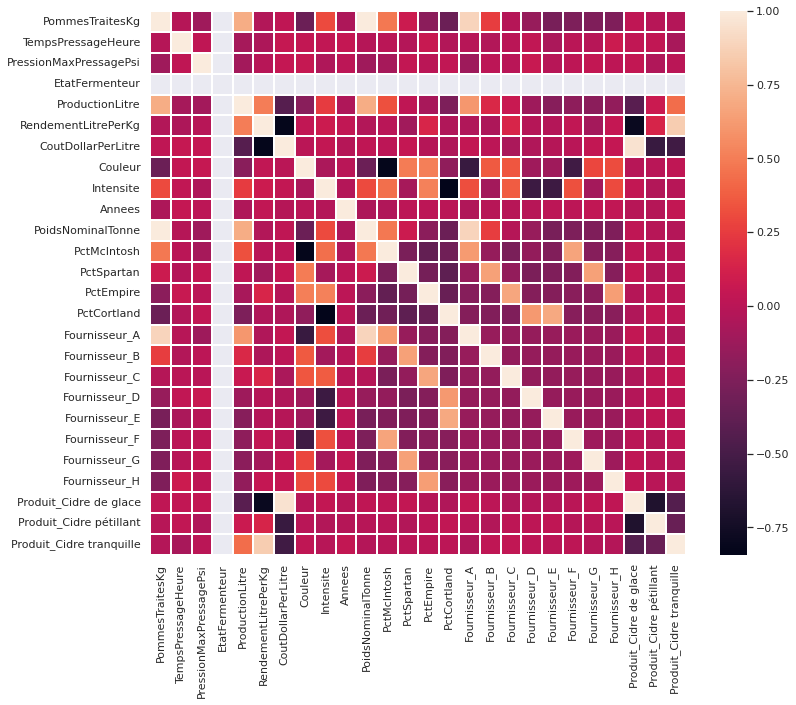

In [543]:
sn.set (rc = {'figure.figsize':(12, 10)})
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.3)

<AxesSubplot:>

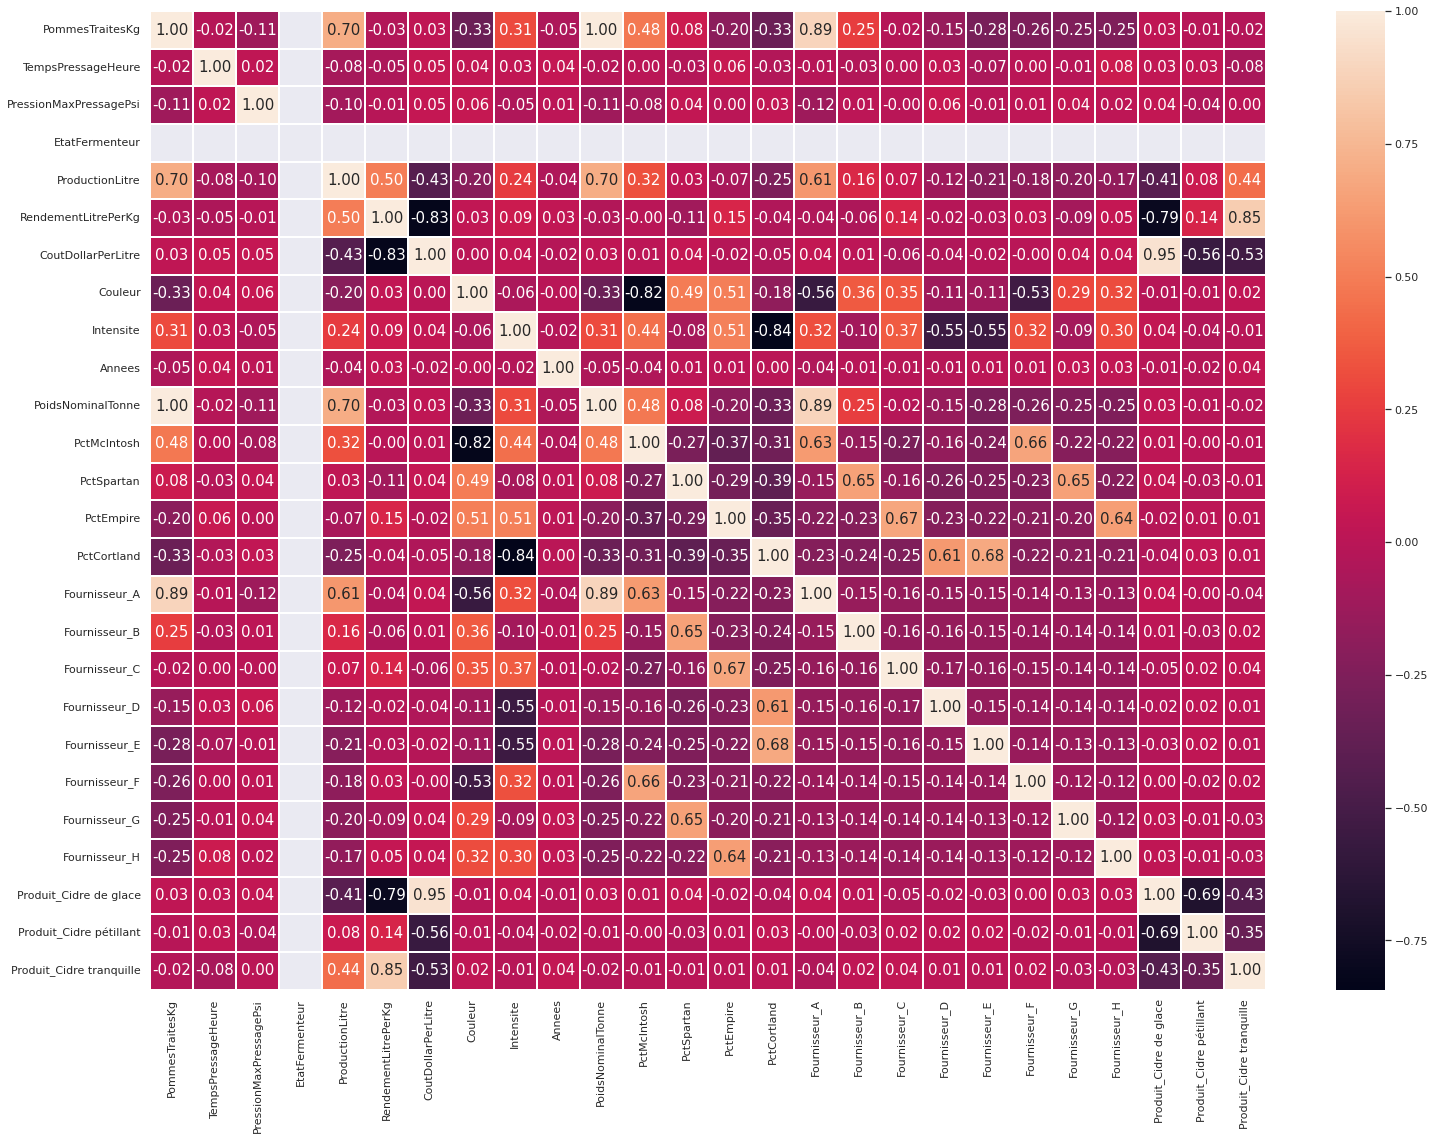

In [544]:
sn.set (rc = {'figure.figsize':(25, 18)})
sn.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size":15}, linewidths=1.5)

##
### Pas très facile à visualizer. C'est à ce moment que l'on fait recours à Knime
### pour la matrice de corrélations
##


##
## Question 2

### Vu que l'on s'intéresse seulement aux fournisseurs A et C et en particulier
### A: tranquille et pétillante
### C: glace
### On génère 3 dataframes à partir du dataframe principal
##

In [545]:
### 1/3
## Create 3 dataframes a_tranq, a_petillant and c_glace 

query_a_tranq = """select LotNo, RendementLitrePerKg, CoutDollarPerLitre 
, Fournisseur_A, Fournisseur_C 
, "Produit_Cidre tranquille"
FROM donnee_interpolate  
WHERE 
Fournisseur_A=1  AND "Produit_Cidre tranquille" = 1 """

df_a_tranq = sqldf(query_a_tranq)

df_a_tranq

,LotNo,RendementLitrePerKg,CoutDollarPerLitre,Fournisseur_A,Fournisseur_C,Produit_Cidre tranquille
0,2012A1001,0.600,4.04,1,0,1
1,2013A1001,0.582,5.86,1,0,1
2,2014A1001,0.579,6.21,1,0,1
3,2015A1001,0.576,8.13,1,0,1
4,2016A1001,0.573,5.86,1,0,1
5,2017A1001,0.558,5.95,1,0,1
6,2018A1001,0.583,5.32,1,0,1
7,2019A1001,0.575,4.95,1,0,1
8,2021A1001,0.597,5.55,1,0,1
9,2022A1001,0.577,6.05,1,0,1


In [546]:
### 2/3
## Create 3 dataframes a_tranq, a_petillant and c_glace 
query_a_petillant = """select LotNo, RendementLitrePerKg, CoutDollarPerLitre 
, Fournisseur_A, Fournisseur_C 
, "Produit_Cidre pétillant"
FROM donnee_interpolate  
WHERE 
Fournisseur_A=1 AND "Produit_Cidre pétillant"=1 """

df_a_petillant = sqldf(query_a_petillant)

df_a_petillant



,LotNo,RendementLitrePerKg,CoutDollarPerLitre,Fournisseur_A,Fournisseur_C,Produit_Cidre pétillant
0,2012A1005,0.286,12.32,1,0,1
1,2012A1013,0.294,11.93,1,0,1
2,2013A1007,0.305,10.19,1,0,1
3,2013A1015,0.294,13.12,1,0,1
4,2014A1007,0.266,12.15,1,0,1
5,2014A1015,0.279,11.53,1,0,1
6,2015A1009,0.300,9.43,1,0,1
7,2015A1017,0.275,6.78,1,0,1
8,2016A1009,0.259,10.02,1,0,1
9,2016A1017,0.274,8.39,1,0,1


In [547]:
### 3/3
## Create 3 dataframes a_tranq, a_petillant and c_glace 
query_c_glace = """select LotNo, RendementLitrePerKg, CoutDollarPerLitre 
, Fournisseur_A, Fournisseur_C 
, "Produit_Cidre de glace"
FROM donnee_interpolate  
WHERE 
Fournisseur_C=1 AND "Produit_Cidre de glace"=1 """

df_c_glace = sqldf(query_c_glace)

df_c_glace

,LotNo,RendementLitrePerKg,CoutDollarPerLitre,Fournisseur_A,Fournisseur_C,Produit_Cidre de glace
0,2012C1020,0.136,27.34,0,1,1
1,2012C1028,0.100,27.30,0,1,1
2,2013C1021,0.119,24.31,0,1,1
3,2013C1029,0.080,34.35,0,1,1
4,2014C1021,0.115,26.46,0,1,1
5,2014C1029,0.104,23.25,0,1,1
6,2015C1028,0.117,35.44,0,1,1
7,2015C1036,0.133,30.74,0,1,1
8,2015C1044,0.071,33.84,0,1,1
9,2016C1028,0.120,27.10,0,1,1


###
#### Définitions des variables pour la question 2
###

In [548]:
### Question 2 - sensitivity analysis


## rendement
col_rend_a_tranq = df_a_tranq['RendementLitrePerKg']
rend_a_tranq_pred = []

col_rend_a_petillant = df_a_petillant['RendementLitrePerKg']
rend_a_petillant_pred = []
                                                                                                                        
col_rend_c_glace = df_c_glace['RendementLitrePerKg']
rend_c_glace_pred = []         

## couts
col_cout_a_tranq = df_a_tranq['CoutDollarPerLitre']
cout_a_tranq_pred = []

col_cout_a_petillant = df_a_petillant['CoutDollarPerLitre']
cout_a_petillant_pred = []

col_cout_c_glace = df_c_glace['CoutDollarPerLitre']
cout_c_glace_pred = []



## quatités
CONST_QTD_A_TRANQ = 500000
CONST_QTD_A_PET = 900000
CONST_QTD_C_GLACE = 1100000
qtd_a_tranquille = CONST_QTD_A_TRANQ #kg/year
qtd_a_petillant = CONST_QTD_A_PET #kg/year
qtd_c_glace = CONST_QTD_C_GLACE #kg/an

## prix
CONST_PRIX_TRANQ = 15
CONST_PRIX_PET = 25
CONST_PRIX_GLACE = 65

prix_tranquille=CONST_PRIX_TRANQ # $/l
prix_petillant = CONST_PRIX_PET # $/l
prix_glace = CONST_PRIX_GLACE # 65/l

CONST_COUTS_FIXES=8000000
couts_fixes=CONST_COUT_FIXES

production_pred = []
profit_pred = []

In [549]:
col_rend_a_tranq

0    0.600
1    0.582
2    0.579
3    0.576
4    0.573
5    0.558
6    0.583
7    0.575
8    0.597
9    0.577
Name: RendementLitrePerKg, dtype: float64

###
#### fonction de simulation
###

In [550]:
### simulation
def simul_profit_production(pNbRuns, pColRendATranq, pColRendAPet, pColRendCGlace \
                            , colCoutATranq, colCoutAPet, colCoutCGlace \
                           , pQtdATranq = CONST_QTD_A_TRANQ, pQtdAPet = CONST_QTD_A_PET, pQtdCGlace = CONST_QTD_C_GLACE, \
                           pPrixTranq = CONST_PRIX_TRANQ, pPrixPet = CONST_PRIX_PET, pPrixGlace = CONST_PRIX_GLACE, \
                           pCoutsFixes = CONST_COUTS_FIXES):
    
    print("[BEGIN simul_profit_production]")
    print("default params") 
    print("[pQtdATranq]: ", pQtdATranq)
    print("[pQtdAPet]: ", pQtdAPet)
    print("[pQtdCGlace]: ", pQtdCGlace)
    print("[pPrixTranq]: ", pPrixTranq)
    print("[pPrixPet]: ", pPrixPet)
    print("[pPrixGlace]: ", pPrixGlace)
    print("[pCoutsFixes]: ", pCoutsFixes)
    
    
    rend_a_tranq_pred = []
    rend_a_petillant_pred = []
    rend_c_glace_pred = []         

    cout_a_tranq_pred = []
    cout_a_petillant_pred = []
    cout_c_glace_pred = []

    production_pred = []
    profit_pred = []

    print("profit_pred: ", len(profit_pred))
    print("production_pred: ", len(production_pred))

    for i in range(pNbRuns):
        #print("----")
        rend_a_tranq = random.choice(pColRendATranq) 
        rend_a_petillant = random.choice(pColRendAPet)
        rend_c_glace = random.choice(pColRendCGlace)
    
        cout_a_tranq = random.choice(pColRendATranq)
        cout_a_petillant = random.choice(pColRendAPet)
        cout_c_glace = random.choice(pColRendCGlace)
    
        ## production
        prod_a_tranq = rend_a_tranq * pQtdATranq
        prod_a_pet = rend_a_petillant * pQtdAPet
        prod_c_glace = rend_c_glace * pQtdCGlace
        
        production = prod_a_tranq + prod_a_pet + prod_c_glace
    
        production_pred.append(production)
    
    
        ## profit
        profit_unit_a_tranq = pPrixTranq - cout_a_tranq
        profit_unit_a_pet = pPrixPet - cout_a_petillant
        profit_unit_c_glace = pPrixGlace - cout_c_glace        
        
        
        profit = (prod_a_tranq * profit_unit_a_tranq) \
        + (prod_a_pet * profit_unit_a_pet) \
        + (prod_c_glace * profit_unit_c_glace)
    
        profit = profit - pCoutsFixes
        
        #print ("profit: ", profit)
        profit_pred.append(profit)
    
        rend_a_tranq_pred.append(rend_a_tranq) 
        rend_a_petillant_pred.append(rend_a_petillant)
        rend_c_glace_pred.append(rend_c_glace) 
    
        cout_a_tranq_pred.append(cout_a_tranq)
        cout_a_petillant_pred.append(cout_a_petillant)
        cout_c_glace_pred.append(cout_c_glace)
    
    rend_a_tranq_pred = pd.DataFrame(rend_a_tranq_pred)
    rend_a_petillant_pred = pd.DataFrame(rend_a_petillant_pred)
    rend_c_glace_pred = pd.DataFrame(rend_c_glace_pred)
    
    cout_a_tranq_pred = pd.DataFrame(cout_a_tranq_pred)
    cout_a_petillant_pred  = pd.DataFrame(cout_a_petillant_pred)
    cout_c_glace_pred = pd.DataFrame(cout_c_glace_pred)

    production_pred=pd.DataFrame(production_pred)
    profit_pred=pd.DataFrame(profit_pred)

    
    return production_pred, profit_pred

####
#### fonction de plotage
###

In [551]:
## plot graph
def plot_graph(pDf, pXlabel):
    ax = pDf.plot.hist(density=False, bins=10)
    ax.set_xlabel(pXlabel)
    pDf.describe()

###
## Question 3 - Probabilité de pertes
#### Définition de la fonction de calcul de probabilité de pertes
###

In [552]:
## prob perte
def calc_loss_probability(pDfProfitPred):
    ### Probabilité de perte
    intervalles_profit = pd.cut(pDfProfitPred[0],10)
    profit_dist = intervalles_profit.value_counts()/(pDfProfitPred.shape[0])
    profit_dist=profit_dist.sort_index()
    prob_perte = sum(i<=0 for i in pDfProfitPred[0])/(pDfProfitPred.shape[0])
    return prob_perte

##
#### Appel à la fonction de simulation
##

In [553]:
## appel à la fonction de simulation
production_pred, profit_pred = simul_profit_production(10000, col_rend_a_tranq, col_rend_a_petillant, col_rend_c_glace \
                            , col_cout_a_tranq, col_cout_a_petillant, col_cout_c_glace \
                            , pQtdATranq = CONST_QTD_A_TRANQ, pQtdAPet = CONST_QTD_A_PET, pQtdCGlace = CONST_QTD_C_GLACE, \
                           pPrixTranq = CONST_PRIX_TRANQ, pPrixPet = CONST_PRIX_PET, pPrixGlace = CONST_PRIX_GLACE, \
                           pCoutsFixes = 18000000)


[BEGIN simul_profit_production]
default params
[pQtdATranq]:  500000
[pQtdAPet]:  900000
[pQtdCGlace]:  1100000
[pPrixTranq]:  15
[pPrixPet]:  25
[pPrixGlace]:  65
[pCoutsFixes]:  18000000
profit_pred:  0
production_pred:  0


In [554]:
production_pred.head()
profit_pred.head()/1000000

,0
0,4.526280
1,-0.472815
2,1.436231
3,1.758369
4,-1.003557


##
### Appel à la fonction de génération de graphiques
##

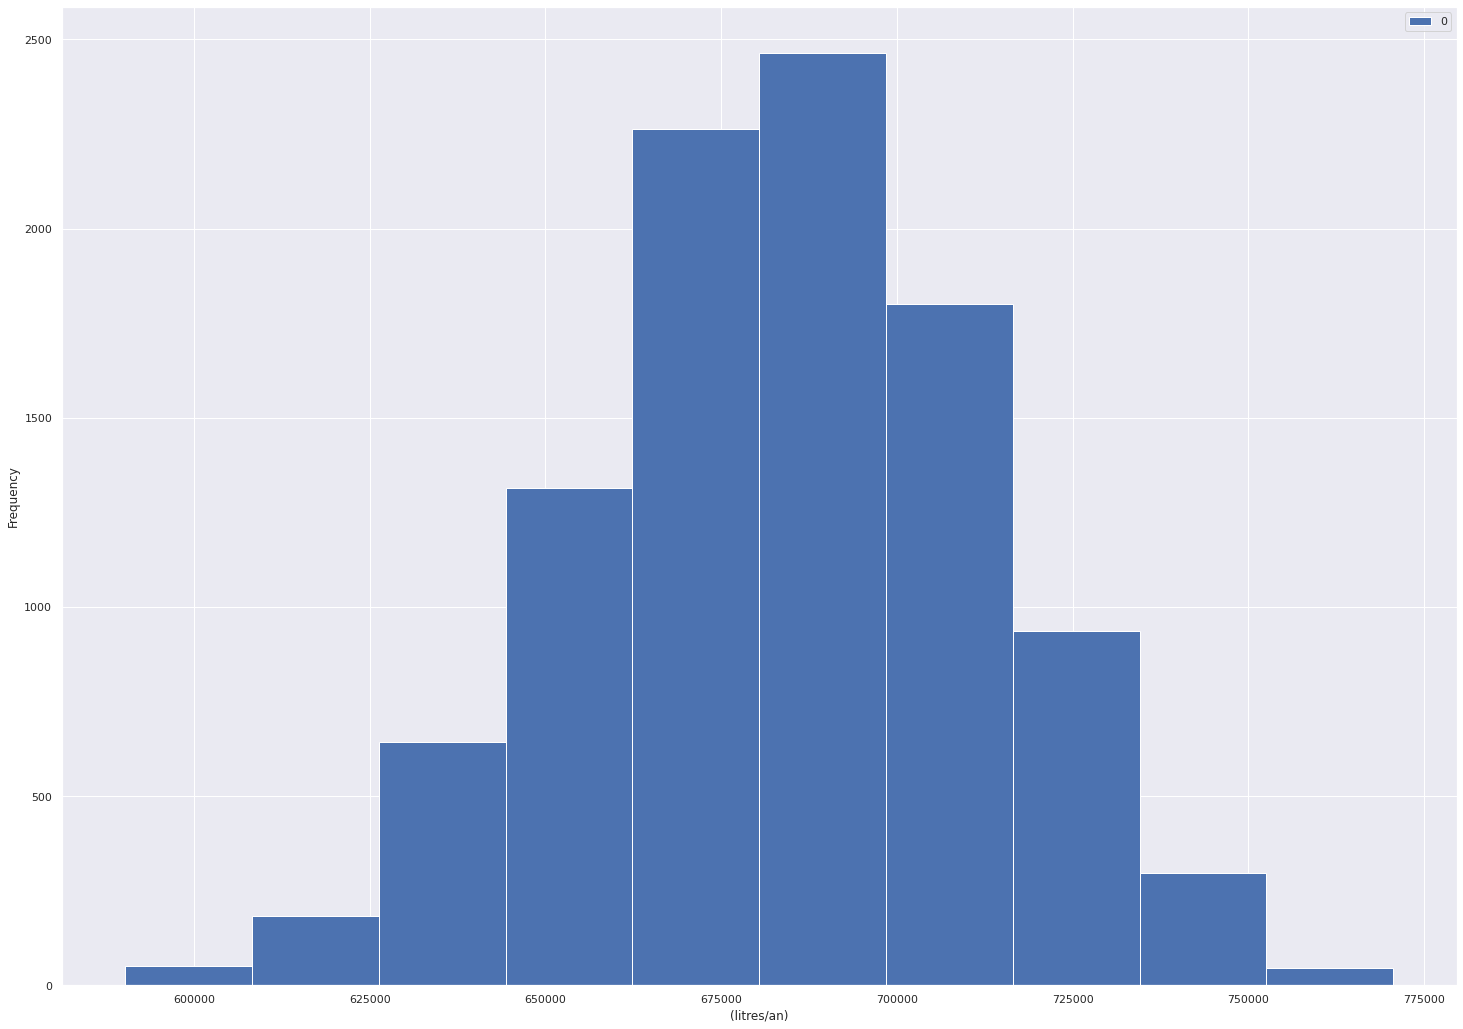

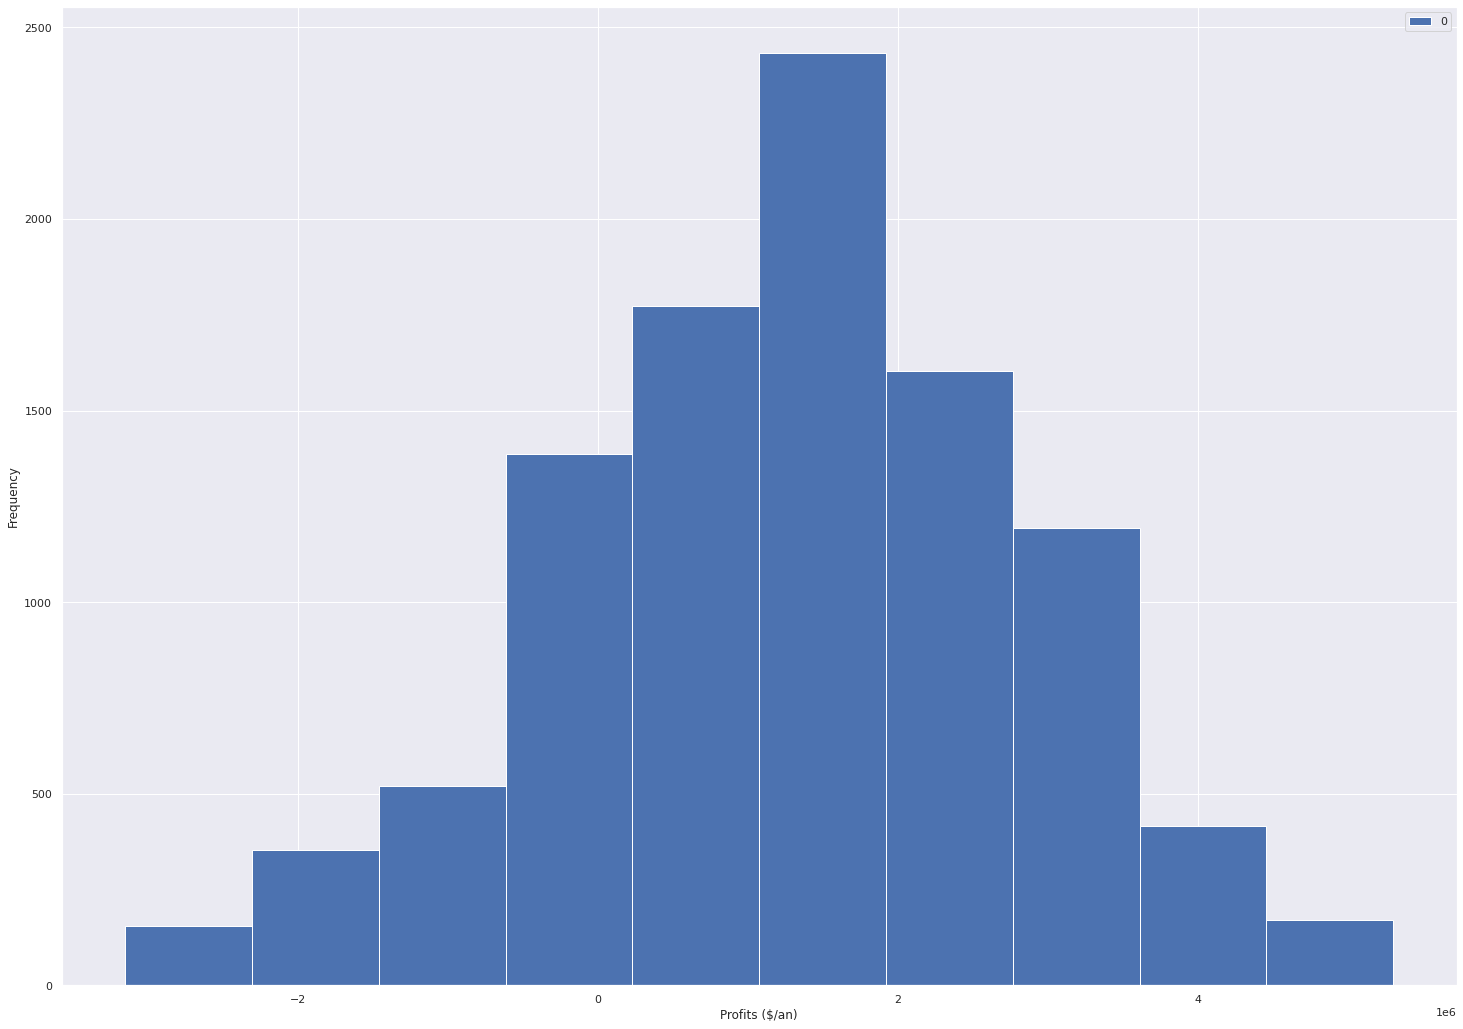

In [555]:
plot_graph(production_pred, "(litres/an)")
plot_graph(profit_pred, "Profits ($/an)")

##
### Appel à la fonction de calcul de probabilité de perte
##

In [556]:
prob_perte = calc_loss_probability(profit_pred)
print("prob perte: ", prob_perte)

prob perte:  0.201
